In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

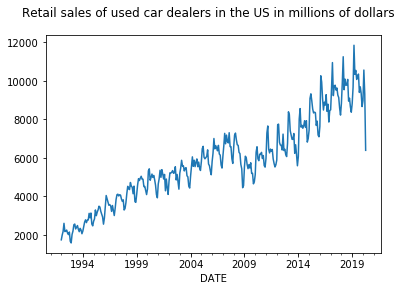

In [3]:
#construct the date parser
mydateparser = lambda x: pd.datetime.strptime(x, '%d-%m-%y')

#load the data set into a pandas data frame
df = pd.read_csv('../../data/retail_sales_used_car_dealers_us_1992_2020.csv', header=0, index_col=0, parse_dates=['DATE'], date_parser=mydateparser)

#plot the data set
fig = plt.figure()
fig.suptitle('Retail sales of used car dealers in the US in millions of dollars')
df['Retail_Sales'].plot()
plt.show()

/opt/conda/envs/tsa_course/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


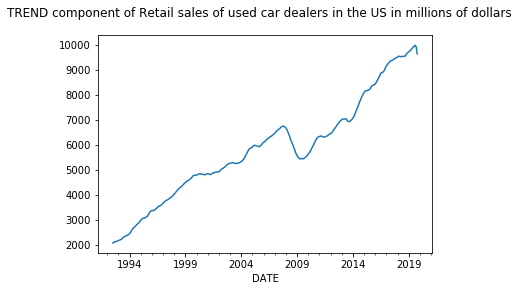

In [4]:
#add a column containing a 2 x 12 centered moving average. this column will capture the trend component in the time series
df['2 x 12 CMA (TREND)'] = np.nan
for i in range(6,df['Retail_Sales'].size-6):
    df['2 x 12 CMA (TREND)'][i] = df['Retail_Sales'][i - 6] * 1.0 / 24 + (
                df['Retail_Sales'][i - 5] + df['Retail_Sales'][i - 4] + df['Retail_Sales'][i - 3] + df['Retail_Sales'][
            i - 2] + df['Retail_Sales'][i - 1] + df['Retail_Sales'][i] + df['Retail_Sales'][i + 1] + df['Retail_Sales'][
                    i + 2] + df['Retail_Sales'][i + 3] + df['Retail_Sales'][i + 4] + df['Retail_Sales'][
                    i + 5]) * 1.0 / 12 + df['Retail_Sales'][i + 6] * 1.0 / 24

#plot the trend component
fig = plt.figure()
fig.suptitle('TREND component of Retail sales of used car dealers in the US in millions of dollars')
df['2 x 12 CMA (TREND)'].plot()
plt.show()

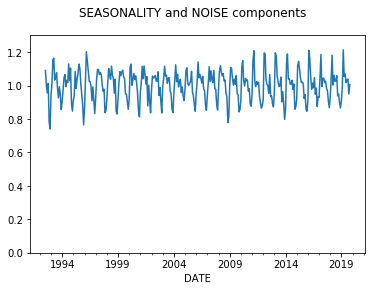

In [5]:
df['SEASONALITY AND NOISE'] = df['Retail_Sales']/df['2 x 12 CMA (TREND)']

#plot the seasonality and noise components
fig = plt.figure()
fig.suptitle('SEASONALITY and NOISE components')
plt.ylim(0, 1.3)
df['SEASONALITY AND NOISE'].plot()
plt.show()


/opt/conda/envs/tsa_course/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


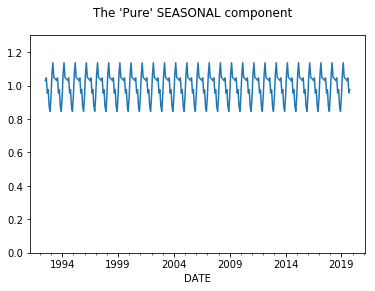

In [6]:
#calculate the average seasonal component for each month

#first add a month column
df['MONTH'] = df.index.strftime('%m').astype(np.int)

#initialize the month based dictionaries to store the running total of themonth wise  seasonal sums and counts
average_seasonal_values = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}
average_seasonal_value_counts = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}

#calculate the sums and counts
for i in range(0, df['SEASONALITY AND NOISE'].size):
    if math.isnan(df['SEASONALITY AND NOISE'][i]) is False:
        average_seasonal_values[df['MONTH'][i]] = average_seasonal_values[df['MONTH'][i]] + df['SEASONALITY AND NOISE'][
            i]
        average_seasonal_value_counts[df['MONTH'][i]] = average_seasonal_value_counts[df['MONTH'][i]] + 1

#calculate the average seasonal component for each month
for i in range(1, 13):
    average_seasonal_values[i] = average_seasonal_values[i] / average_seasonal_value_counts[i]

#create a new column in the data frame and fill it with the value of the average seasonal component for the corresponding month
df['SEASONALITY'] = np.nan
for i in range(0, df['SEASONALITY AND NOISE'].size):
    if math.isnan(df['SEASONALITY AND NOISE'][i]) is False:
        df['SEASONALITY'][i] = average_seasonal_values[df['MONTH'][i]]

#plot the seasonal component
fig = plt.figure()
fig.suptitle('The \'Pure\' SEASONAL component')
plt.ylim(0, 1.3)
df['SEASONALITY'].plot()
plt.show()

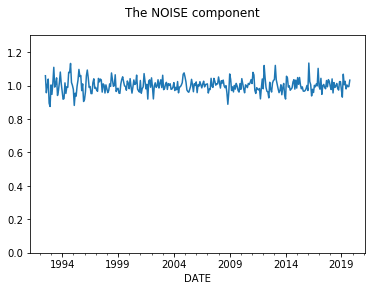

In [7]:
df['NOISE'] = df['SEASONALITY AND NOISE']/df['SEASONALITY']

#plot the seasonal component
fig = plt.figure()
fig.suptitle('The NOISE component')
plt.ylim(0, 1.3)
df['NOISE'].plot()
plt.show()

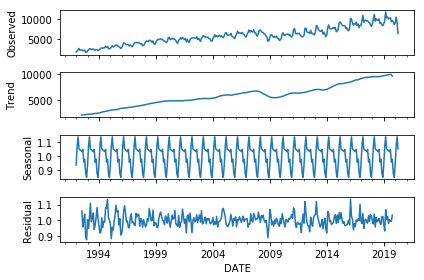

In [8]:
#Do all of the above using  one line of code!
from statsmodels.tsa.seasonal import seasonal_decompose
components = seasonal_decompose(df['Retail_Sales'], model='multiplicative')
components.plot()
plt.show()